In [1]:
import re
import os 
import datetime
from math import log
import csv
import pprint
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
from pandas.io.parsers import read_csv
pd.set_option('max_colwidth',120)
from elasticsearch import Elasticsearch, helpers
from elasticsearch.helpers import scan
from __future__ import division

%matplotlib inline

pp = pprint.PrettyPrinter()

In [2]:
#bashcommand='pwd'

In [3]:
es = Elasticsearch([{'host':'atlas-kibana.mwt2.org', 'port':9200}],timeout=20)

In [4]:
indices = es.cat.indices(index=['jobs_archive_2016-09-11','jobs_archive_2016-09-12','jobs_archive_2016-09-12','jobs_archive_2016-09-13',
                                'jobs_archive_2016-09-14','jobs_archive_2016-09-15','jobs_archive_2016-09-16','jobs_archive_2016-09-17','jobs_archive_2016-09-18'], h="index", request_timeout=10).split('\n')
indices = sorted(indices)
indices = [x.replace(" ", "") for x in indices if x != '']

In [5]:
print (indices)

['jobs_archive_2016-09-11', 'jobs_archive_2016-09-12', 'jobs_archive_2016-09-13', 'jobs_archive_2016-09-14', 'jobs_archive_2016-09-15', 'jobs_archive_2016-09-16', 'jobs_archive_2016-09-17', 'jobs_archive_2016-09-18']


In [6]:
ss={
 "query": { "wildcard": { "computingsite": "*IN2P3-CC*" } 
}, "_source": ["pandaid","batchid","computingsite","computingelement","corecount","creationtime","starttime","endtime",
   "cpuconsumptiontime","wall_time","modificationhost","maxrss","maxpss","jobstatus"]
#    ,"size": 5
    }



#ss= {"query": { "match_all": {} },"size": 10000} 
print (ss)



{'query': {'wildcard': {'computingsite': '*IN2P3-CC*'}}, '_source': ['pandaid', 'batchid', 'computingsite', 'computingelement', 'corecount', 'creationtime', 'starttime', 'endtime', 'cpuconsumptiontime', 'wall_time', 'modificationhost', 'maxrss', 'maxpss', 'jobstatus']}


In [7]:
#res = es.search(index='jobs_archive_2016-06-26', body=ss, filter_path=['hits.hits._source'],request_timeout=12000)

In [8]:
res=es.search(index=indices, body=ss,request_timeout=12000)
#print (res)
len(res)
#print (res)

4

In [9]:
 #res.get('hits').get('hits')

In [10]:
scroll=scan(es,index=indices, query=ss,scroll=u'30m', raise_on_error=True, preserve_order=False, size=500000,request_timeout=7000)

In [11]:
c=1
list2=[]
for name in scroll:
 a=name.get('_source')
 list2.append(a)
 c=c+1
print (c)
type(list2)
dfu = pd.DataFrame(list2)
 
#dfu.batchid.count()
dfu.head()
 
 

358565


,batchid,computingelement,computingsite,corecount,cpuconsumptiontime,creationtime,endtime,jobstatus,maxpss,maxrss,modificationhost,pandaid,starttime,wall_time
0,15461543,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,65,2016-09-11T00:11:55,2016-09-11T00:17:40,failed,699848.0,821480.0,ccwsge0015,2987965098,2016-09-11T00:14:31,189
1,15461657,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,61,2016-09-11T00:11:57,2016-09-11T00:16:41,failed,211210.0,302976.0,ccwsge0176,2987965102,2016-09-11T00:14:33,128
2,15458231,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,12,2016-09-10T16:52:11,2016-09-10T23:34:14,failed,193341.0,289284.0,ccwsge0187,2987670922,2016-09-10T22:41:59,3135
3,15458679,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,12,2016-09-10T16:52:11,2016-09-10T23:14:02,failed,192004.0,289400.0,ccwsge0005,2987670919,2016-09-10T22:41:58,1924
4,15459282,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,12,2016-09-10T16:52:14,2016-09-10T23:15:20,failed,171857.0,293168.0,ccwsge0184,2987671026,2016-09-10T22:43:29,1911


In [12]:
dfu.groupby(dfu.computingsite).computingsite.count()

computingsite
ANALY_IN2P3-CC          212876
IN2P3-CC                109962
IN2P3-CC-T3_MCORE            7
IN2P3-CC-T3_VM01          2083
IN2P3-CC-T3_VM02         10260
IN2P3-CC_MCORE           18872
IN2P3-CC_MCORE_HIMEM      2813
IN2P3-CC_VVL              1691
Name: computingsite, dtype: int64

In [13]:
dfu.groupby(dfu.computingsite).count()

,batchid,computingelement,corecount,cpuconsumptiontime,creationtime,endtime,jobstatus,maxpss,maxrss,modificationhost,pandaid,starttime,wall_time
computingsite,,,,,,,,,,,,,
ANALY_IN2P3-CC,209251,212852,206164,212876,212876,212876,212876,201335,201335,212876,212876,209253,212876
IN2P3-CC,63492,109897,109957,109962,109962,109962,109962,60528,60528,109962,109962,63514,109962
IN2P3-CC-T3_MCORE,0,7,7,7,7,7,7,0,0,7,7,0,7
IN2P3-CC-T3_VM01,2074,2083,2080,2083,2083,2083,2083,2056,2056,2083,2083,2074,2083
IN2P3-CC-T3_VM02,10244,10260,10260,10260,10260,10260,10260,9514,9514,10260,10260,10244,10260
IN2P3-CC_MCORE,18841,18847,18872,18872,18872,18872,18872,18805,18805,18872,18872,18842,18872
IN2P3-CC_MCORE_HIMEM,2443,2813,2813,2813,2813,2813,2813,2428,2428,2813,2813,2443,2813
IN2P3-CC_VVL,1669,1691,1691,1691,1691,1691,1691,1656,1656,1691,1691,1669,1691


In [14]:


#rint (res.get('hits').get('hits'))
#list.head()
#res[0]
#res['total']

In [15]:
dfu.head()

,batchid,computingelement,computingsite,corecount,cpuconsumptiontime,creationtime,endtime,jobstatus,maxpss,maxrss,modificationhost,pandaid,starttime,wall_time
0,15461543,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,65,2016-09-11T00:11:55,2016-09-11T00:17:40,failed,699848.0,821480.0,ccwsge0015,2987965098,2016-09-11T00:14:31,189
1,15461657,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,61,2016-09-11T00:11:57,2016-09-11T00:16:41,failed,211210.0,302976.0,ccwsge0176,2987965102,2016-09-11T00:14:33,128
2,15458231,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,12,2016-09-10T16:52:11,2016-09-10T23:34:14,failed,193341.0,289284.0,ccwsge0187,2987670922,2016-09-10T22:41:59,3135
3,15458679,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,12,2016-09-10T16:52:11,2016-09-10T23:14:02,failed,192004.0,289400.0,ccwsge0005,2987670919,2016-09-10T22:41:58,1924
4,15459282,ANALY_IN2P3-CC,ANALY_IN2P3-CC,1.0,12,2016-09-10T16:52:14,2016-09-10T23:15:20,failed,171857.0,293168.0,ccwsge0184,2987671026,2016-09-10T22:43:29,1911


In [16]:
 dfu.groupby(['computingsite']).count()

,batchid,computingelement,corecount,cpuconsumptiontime,creationtime,endtime,jobstatus,maxpss,maxrss,modificationhost,pandaid,starttime,wall_time
computingsite,,,,,,,,,,,,,
ANALY_IN2P3-CC,209251,212852,206164,212876,212876,212876,212876,201335,201335,212876,212876,209253,212876
IN2P3-CC,63492,109897,109957,109962,109962,109962,109962,60528,60528,109962,109962,63514,109962
IN2P3-CC-T3_MCORE,0,7,7,7,7,7,7,0,0,7,7,0,7
IN2P3-CC-T3_VM01,2074,2083,2080,2083,2083,2083,2083,2056,2056,2083,2083,2074,2083
IN2P3-CC-T3_VM02,10244,10260,10260,10260,10260,10260,10260,9514,9514,10260,10260,10244,10260
IN2P3-CC_MCORE,18841,18847,18872,18872,18872,18872,18872,18805,18805,18872,18872,18842,18872
IN2P3-CC_MCORE_HIMEM,2443,2813,2813,2813,2813,2813,2813,2428,2428,2813,2813,2443,2813
IN2P3-CC_VVL,1669,1691,1691,1691,1691,1691,1691,1656,1656,1691,1691,1669,1691


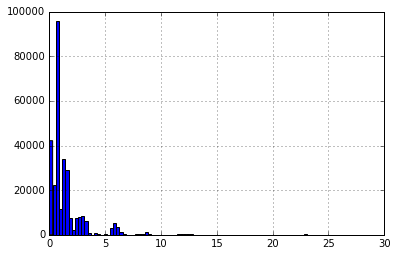

In [22]:
b=dfu.maxpss/1024/1024
b.hist(bins=100)

In [20]:
dfu.memory_usage()

Index                      80
batchid               2868512
computingelement      2868512
computingsite         2868512
corecount             2868512
cpuconsumptiontime    2868512
creationtime          2868512
endtime               2868512
jobstatus             2868512
maxpss                2868512
maxrss                2868512
modificationhost      2868512
pandaid               2868512
starttime             2868512
wall_time             2868512
dtype: int64

In [21]:
dfu.to_csv('./ev_example_11_16_sep2016.csv')